<!-- Webscraping From British Airways  For Customer Reviews-->

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import contractions
from string import punctuation
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
data=[]
page_size=100
base_url="https://www.airlinequality.com/airline-reviews/british-airways/"
for air in range(1,11):
    url=f'{base_url}/page/{air}/?sortby=post_date%3ADesc&pagesize={page_size}'
    base=requests.get(url)
    soup=BeautifulSoup(base.text,"html.parser")
    for web in soup.find_all("div",class_="text_content"):
        data.append(web.text)
print(f'The lenght of text is:{len(data)}')
        
frame=pd.DataFrame(data)
frame

The lenght of text is:1000


,0
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...
...,...
995,✅ Trip Verified | The seating configuration m...
996,✅ Trip Verified | No problems at the airport i...
997,✅ Trip Verified | Malaga to London Heathrow ....
998,✅ Trip Verified | Sydney to Singapore. Extrem...


<!-- Expolatory Data Analysis-->

In [189]:
airways=pd.DataFrame(data,columns=['Customer_Reviews'])

In [191]:
airways.isnull().sum()

Customer_Reviews    0
dtype: int64

In [7]:
airways.duplicated().sum()

0

In [8]:
airways.columns

Index(['Customer_Reviews'], dtype='object')

In [9]:
airways['Customer_Reviews'].nunique()

1000

<!-- Data Cleaning steps -->

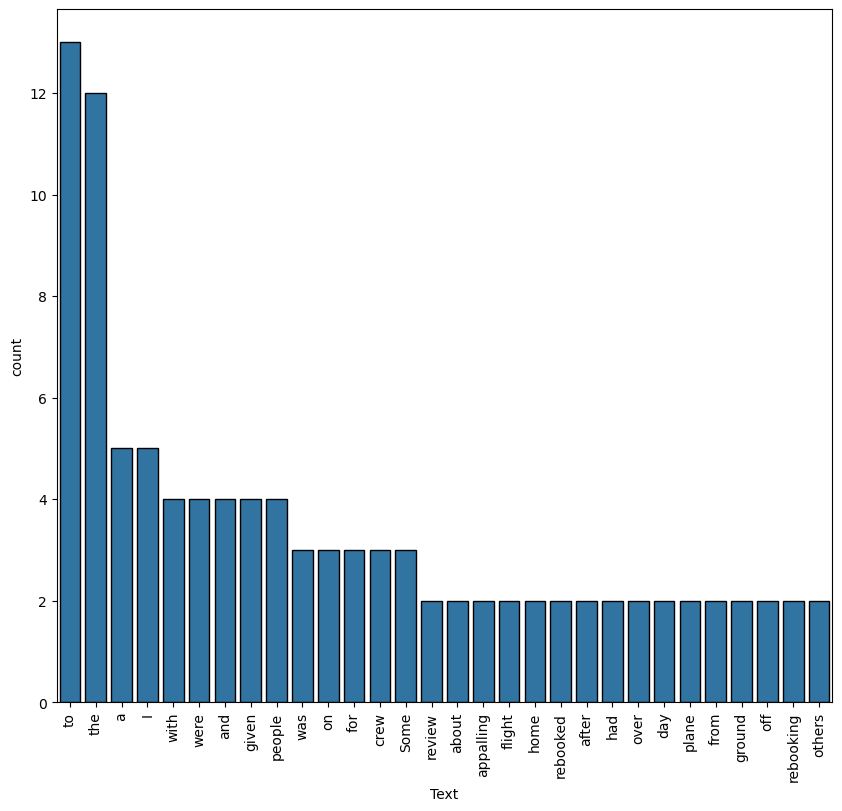

In [193]:
pattern=airways['Customer_Reviews'].apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
pattern_frame=pd.DataFrame(pattern)
pattern_text=pattern_frame['Customer_Reviews'].apply(lambda x:x.split())
for i in pattern_text:
    b=Counter(i)
most_20=b.most_common(30)
frame=pd.DataFrame(most_20,columns=['Text','count'])
plt.figure(figsize=(10,9))
plt.xticks(rotation=90)
sns.barplot(x='Text',y='count',data=frame,edgecolor='black')
plt.show()


In [195]:
new_text=pd.DataFrame(pattern_text)

In [13]:
!pip install contractions

In [197]:
def contract_text(input_text):
    text=[]
    for i in input_text:
        b=contractions.fix(i)
        text.append(i)
    return text
new_text['Customer_Reviews']=new_text['Customer_Reviews'].apply(contract_text)

In [15]:
new_text

,Customer_Reviews
0,"[Trip, Verified, British, Airways, is, absolut..."
1,"[Trip, Verified, The, flight, time, was, chang..."
2,"[Trip, Verified, I, m, so, fraustrated, My, fl..."
3,"[Trip, Verified, We, have, sat, on, this, plan..."
4,"[Not, Verified, British, Airways, stranding, m..."
...,...
995,"[Trip, Verified, The, seating, configuration, ..."
996,"[Trip, Verified, No, problems, at, the, airpor..."
997,"[Trip, Verified, Malaga, to, London, Heathrow,..."
998,"[Trip, Verified, Sydney, to, Singapore, Extrem..."


In [199]:
def punct_text(input_text):
    p_text=[]
    for i in input_text:
        if i not in punctuation:
            p_text.append(i)
    return p_text
new_text['Customer_Reviews']=new_text['Customer_Reviews'].apply(punct_text)         

In [201]:
def digit_text(input_text):
    d_text=[]
    for i in input_text:
        if i not in  string.digits:
            d_text.append(i)
    return d_text
new_text['Customer_Reviews']=new_text['Customer_Reviews'].apply(digit_text)

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
words=stopwords.words('english')
old_words=['to','the','i','where']
real_words=words + old_words

In [205]:
def words(input_text):
    stop=[]
    for i in input_text:
        if i not in real_words:
            stop.append(i)
    return stop
new_text['Customer_Reviews']=new_text['Customer_Reviews'].apply(words)

In [207]:
ps=WordNetLemmatizer()
def stemmer(input_text):
    stem_text=[]
    for i in input_text:
        stem=ps.lemmatize(i)
        stem_text.append(stem)
    return stem_text
new_text['Customer_Reviews']=new_text['Customer_Reviews'].apply(stemmer)

In [229]:
new_text['Customer_Reviews']=new_text['Customer_Reviews'].astype(str).apply(lambda x: x.lower())

(-0.5, 799.5, 399.5, -0.5)

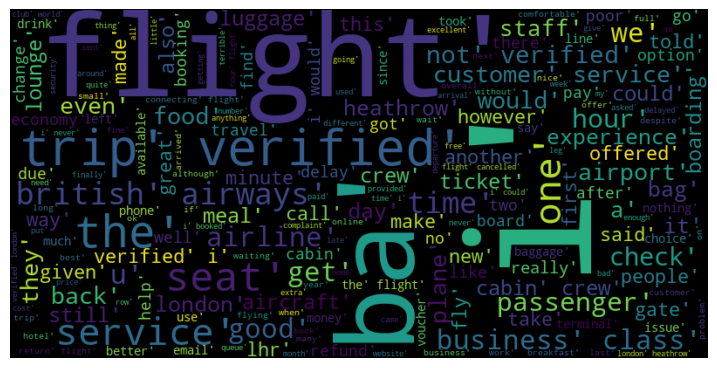

In [231]:
from wordcloud import WordCloud
joined_text="".join(new_text['Customer_Reviews'])
visual_cloud=WordCloud(width=800,height=400,background_color='black').generate(joined_text)
plt.figure(figsize=(9,7))
plt.imshow(visual_cloud,interpolation='bilinear')
plt.axis('off')

In [149]:
new_text

,Customer_Reviews
0,"[['trip',, 'verified',, 'british',, 'airways',..."
1,"[['trip',, 'verified',, 'the',, 'flight',, 'ti..."
2,"[['trip',, 'verified',, 'i',, 'fraustrated',, ..."
3,"[['trip',, 'verified',, 'we',, 'sat',, 'plane'..."
4,"[['not',, 'verified',, 'british',, 'airways',,..."
...,...
995,"[['trip',, 'verified',, 'the',, 'seating',, 'c..."
996,"[['trip',, 'verified',, 'no',, 'problem',, 'ai..."
997,"[['trip',, 'verified',, 'malaga',, 'london',, ..."
998,"[['trip',, 'verified',, 'sydney',, 'singapore'..."


In [109]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
bag_of_words=vector.fit_transform(new_text['Customer_Reviews'])
numerical_text=bag_of_words.toarray()
print(numerical_text)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
